<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ellipses-with-Shapely" data-toc-modified-id="Ellipses-with-Shapely-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ellipses with Shapely</a></span></li><li><span><a href="#by-tile_id" data-toc-modified-id="by-tile_id-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>by tile_id</a></span></li><li><span><a href="#by-obsid" data-toc-modified-id="by-obsid-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>by obsid</a></span></li></ul></div>

# Ellipses with Shapely 

In [1]:
from planet4 import markings

In [2]:
d = dict(x=1, y=2, radius_1=3, radius_2=2, angle=35)
blotch = markings.Blotch(pd.Series(d))

In [3]:
%matplotlib inline

In [10]:
from planet4 import io, plotting
obsid = 'ESP_011544_0985'
id_ = 'bdb'
pm = io.PathManager(obsid=obsid, datapath='p4_analysis/p4_catalog')

In [11]:
pm.obsid_final_blotches_path

PosixPath('/Users/klay6683/Dropbox/data/planet4/p4_analysis/p4_catalog/ESP_011544_0985_blotches.csv')

In [12]:
from planet4.catalog_production import ReleaseManager

In [13]:
rm = ReleaseManager('v1.0')

In [14]:
df = rm.read_blotch_file()

In [15]:
df = pd.read_csv(pm.obsid_final_blotches_path)

# by tile_id

In [216]:
fans = pd.read_csv("/Users/klay6683/Dropbox/CTX_to_jpg/P4_catalog_v1/P4_catalog_v1.0_cut_0.5_fan.csv")

blotches = pd.read_csv("/Users/klay6683/Dropbox/CTX_to_jpg/P4_catalog_v1/P4_catalog_v1.0_cut_0.5_blotch.csv")

In [217]:
id_

'bdb'

In [218]:
blotches = blotches[blotches.tile_id == io.check_and_pad_id(id_)]

In [219]:
fans = fans[fans.tile_id == io.check_and_pad_id(id_)]

In [220]:
import geopandas as gp

In [221]:
import shapely

In [222]:
gs_blotch = gp.GeoSeries([markings.Blotch(row).to_shapely() for _,row in blotches.iterrows()])

gs_fans = gp.GeoSeries([markings.Fan(row).to_shapely() for _,row in fans.iterrows()])

In [223]:
gs = pd.concat([gs_blotch, gs_fans], ignore_index=True, sort=True)

In [224]:
id_ = 'bdb'
p4id = markings.ImageID(id_)

In [95]:
%matplotlib ipympl

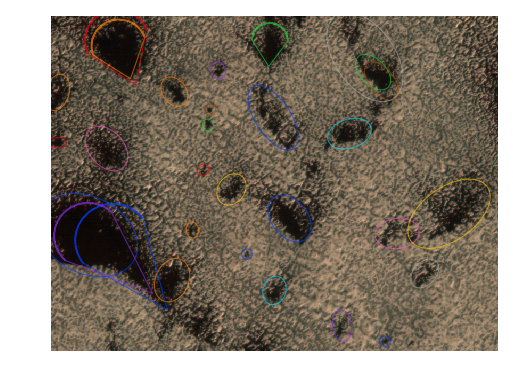

In [226]:
p4id.plot_fans(data=fans)
ax =plt.gca()
p4id.plot_blotches(data=blotches, ax=ax)

<Figure size 432x288 with 0 Axes>

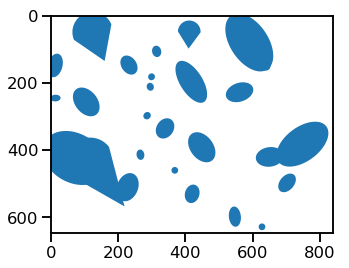

In [225]:
plt.figure()
gs.plot()
ax = plt.gca()
ax.set_xlim((0, markings.IMG_X_SIZE))
ax.set_ylim((0, markings.IMG_Y_SIZE))
ax.invert_yaxis()

In [227]:
gs.head()

0    POLYGON ((155.3051658836881 472.8084264553739,...
1    POLYGON ((211.6192116049175 550.8363739068183,...
2    POLYGON ((633.2858484015004 138.7152215327977,...
3    POLYGON ((-2.658795681296709 245.5861936207943...
4    POLYGON ((317.9862579337073 122.4427894462133,...
dtype: object

In [228]:
from shapely.ops import unary_union

In [229]:
unionized = gs.unary_union

In [230]:
x, y = markings.calc_fig_size(8)

In [231]:
import seaborn as sns
sns.set_context('talk')

In [238]:
squared_pixel_scale = fans.map_scale.iloc[0]**2
squared_pixel_scale

0.0625

In [240]:
area = unionized.area * squared_pixel_scale
area

7608.407912114165

In [246]:
pixel_area = markings.IMG_X_SIZE * markings.IMG_Y_SIZE
tile_area = pixel_area * squared_pixel_scale
tile_area

34020.0

In [247]:
fraction = area / tile_area
fraction

0.2236451473284587

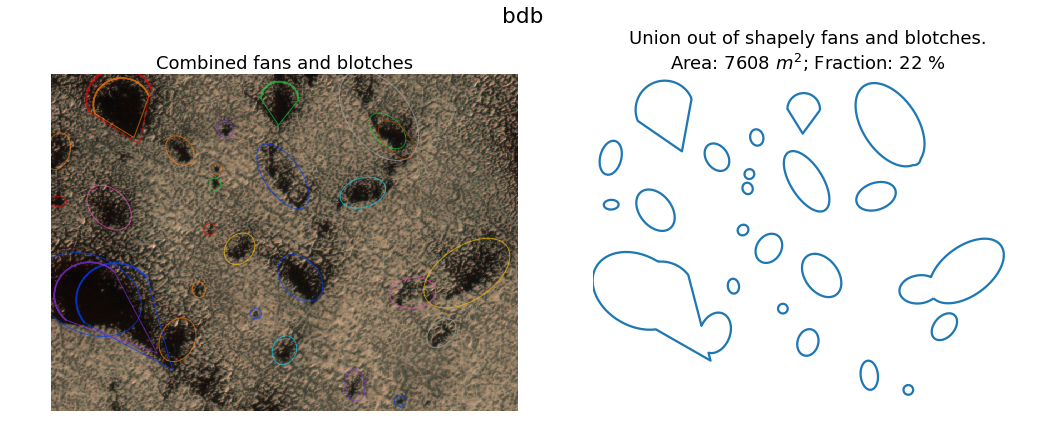

In [256]:
fig, ax = plt.subplots(ncols=2, figsize=(1.8*x, y), constrained_layout=True)
p4id.plot_fans(data=fans, ax=ax[0])
p4id.plot_blotches(data=blotches, ax=ax[0])
# p4id.show_subframe(ax=ax[1])
gp.GeoSeries(unionized).boundary.plot(ax=ax[1])
ax[1].set_xlim(-25, markings.IMG_X_SIZE+25)
ax[1].set_ylim(markings.IMG_Y_SIZE+25, -25)

ax[1].set_axis_off()
fig.suptitle(id_)
ax[0].set_title('Combined fans and blotches')
ax[1].set_title(f"""Union out of shapely fans and blotches.
Area: {area:.0f} $m^2$; Fraction: {fraction*100:.0f} %""")
fig.savefig('shapely_both.png', dpi=100)

In [169]:
poly = unionized[0]

In [170]:
poly.boundary.xy[0][0]

445.19308606891116

In [171]:
df1 = gp.GeoDataFrame({'geometry': gs})
df1.head()

,geometry
0,"POLYGON ((155.3051658836881 472.8084264553739,..."
1,"POLYGON ((211.6192116049175 550.8363739068183,..."
2,"POLYGON ((633.2858484015004 138.7152215327977,..."
3,POLYGON ((-2.658795681296709 245.5861936207943...
4,"POLYGON ((317.9862579337073 122.4427894462133,..."


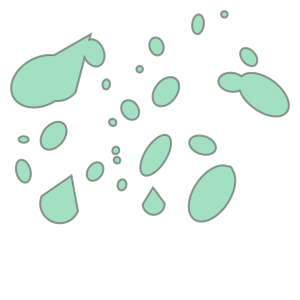

In [179]:
unionized

FigureCanvasNbAgg()

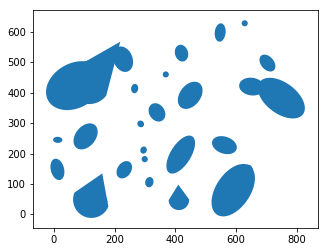

In [172]:
inters = gp.overlay(df1, df1, how='intersection')
inters.plot()

# by obsid

In [290]:
fans.columns

Index(['angle', 'distance', 'tile_id', 'image_x', 'image_y', 'marking_id',
       'n_votes', 'obsid', 'spread', 'version', 'vote_ratio', 'x', 'x_angle',
       'y', 'y_angle', 'l_s', 'north_azimuth', 'map_scale',
       'BodyFixedCoordinateX', 'BodyFixedCoordinateY', 'BodyFixedCoordinateZ',
       'PlanetocentricLatitude', 'PlanetographicLatitude',
       'PositiveEast360Longitude'],
      dtype='object')

In [291]:
fans.l_s.value_counts()

242.279    950
Name: l_s, dtype: int64

In [305]:
obsid = 'ESP_012643_0945'
obsid = 'ESP_013049_0950'
# obsid = 'ESP_011447_0950'

In [306]:
fans = pd.read_csv("/Users/klay6683/Dropbox/CTX_to_jpg/P4_catalog_v1/P4_catalog_v1.0_cut_0.5_fan.csv")

blotches = pd.read_csv("/Users/klay6683/Dropbox/CTX_to_jpg/P4_catalog_v1/P4_catalog_v1.0_cut_0.5_blotch.csv")

In [300]:
fans[fans.obsid.map(lambda x: x.endswith("_0950"))].obsid.value_counts()

ESP_020146_0950    2698
ESP_020357_0950    2530
ESP_020476_0950    2081
ESP_020568_0950    1934
ESP_020779_0950    1305
ESP_021491_0950    1171
ESP_020150_0950     879
ESP_012212_0950     829
ESP_011448_0950     745
ESP_011447_0950     708
ESP_012693_0950     688
ESP_013049_0950     625
ESP_011843_0950     527
ESP_011777_0950     480
ESP_020401_0950     452
ESP_012838_0950     439
ESP_012344_0950     305
ESP_011921_0950     264
ESP_012753_0950     263
ESP_012265_0950     227
ESP_013260_0950     218
ESP_012845_0950     204
ESP_020480_0950     148
ESP_021482_0950      76
ESP_020783_0950      66
ESP_020902_0950      64
ESP_011348_0950       4
ESP_022193_0950       1
Name: obsid, dtype: int64

In [303]:
fans = fans.query("obsid == @obsid")
blotches = blotches.query("obsid == @obsid")

In [304]:
fans.l_s.value_counts()

185.508    708
Name: l_s, dtype: int64

In [260]:
gs_blotch = gp.GeoSeries([markings.Blotch(row).to_shapely() for _,row in blotches.iterrows()])

gs_fans = gp.GeoSeries([markings.Fan(row).to_shapely() for _,row in fans.iterrows()])

In [261]:
gs = pd.concat([gs_blotch, gs_fans], ignore_index=True, sort=True)

In [262]:
gs.shape

(3161,)

In [284]:
unioned = gs.iloc[:2216].unary_union

TopologyException: Input geom 1 is invalid: Self-intersection at or near point 774.26061536555585 113.30668756595594 at 774.26061536555585 113.30668756595594


ValueError: No Shapely geometry can be created from null value

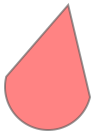

In [281]:
gs.iloc[2215]

In [286]:
print(np.array(gs.iloc[2215].boundary)[:5])
np.array(gs.iloc[2215].boundary)[-5:]


[[774.26061537 113.30668757]
 [752.39       205.61      ]
 [690.3445502  133.85634182]
 [690.03967526 132.51992722]
 [689.77735548 131.17451239]]


array([[773.09394173, 109.36484822],
       [773.52447046, 110.66623123],
       [773.91349224, 111.98061884],
       [774.26061537, 113.30668757],
       [774.26061537, 113.30668757]])

In [288]:
print(np.array(gs.iloc[2214].boundary)[:5])
np.array(gs.iloc[2214].boundary)[-5:]


[[127.78687601 203.0645056 ]
 [ 71.46       359.39      ]
 [-36.66404541 233.21722971]
 [-37.10099018 230.60079545]
 [-37.45470093 227.9718151 ]]


array([[125.98145343, 195.31674559],
       [126.66512758, 197.87979819],
       [127.26713716, 200.46325197],
       [127.78687601, 203.0645056 ],
       [127.78687601, 203.0645056 ]])

In [289]:
fans

,angle,distance,tile_id,image_x,image_y,marking_id,n_votes,obsid,spread,version,...,y_angle,l_s,north_azimuth,map_scale,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,PositiveEast360Longitude
66386,250.68,274.38,APF0000bd6,2063.43,24373.00,F012573,27,ESP_012643_0945,74.84,1,...,-0.94,242.279,122.216966,0.25,-283.310954,-6.679879,-3369.693411,-85.192763,-85.248928,181.350664
66387,244.68,309.25,APF0000bd6,2216.03,24758.13,F012574,30,ESP_012643_0945,62.77,1,...,-0.89,242.279,122.216966,0.25,-283.375047,-6.600349,-3369.688126,-85.191705,-85.247882,181.334287
66388,249.91,426.75,APF0000bd6,1797.37,24570.52,F012575,25,ESP_012643_0945,67.87,1,...,-0.92,242.279,122.216966,0.25,-283.385700,-6.713480,-3369.688201,-85.191481,-85.247660,181.357098
66389,259.61,227.20,APF0000bd7,3031.46,5839.39,F012576,39,ESP_012643_0945,60.41,1,...,-0.98,242.279,122.216966,0.25,-279.216721,-8.719379,-3370.008715,-85.261369,-85.316739,181.788651
66390,256.24,127.65,APF0000bd7,3712.39,5685.61,F012577,38,ESP_012643_0945,54.18,1,...,-0.97,242.279,122.216966,0.25,-279.101283,-8.590869,-3370.018118,-85.263398,-85.318744,181.763035
66391,250.40,370.22,APF0000bd9,587.82,34581.24,F012579,11,ESP_012643_0945,67.60,1,...,-0.94,242.279,122.216966,0.25,-285.675976,-5.760030,-3369.494001,-85.152898,-85.209524,181.155087
66392,267.41,99.89,APF0000bd9,760.07,34576.86,F01257a,7,ESP_012643_0945,86.28,1,...,-1.00,242.279,122.216966,0.25,-285.654147,-5.723398,-3369.496163,-85.153282,-85.209904,181.147831
66393,270.72,82.42,APF0000bd9,667.33,34101.67,F01257b,6,ESP_012643_0945,74.74,1,...,-1.00,242.279,122.216966,0.25,-285.563543,-5.801029,-3369.502832,-85.154795,-85.211399,181.163765
66394,253.92,366.71,APF0000bda,1296.44,22309.80,F01257f,20,ESP_012643_0945,54.76,1,...,-0.95,242.279,122.216966,0.25,-282.962004,-7.095487,-3369.723982,-85.198526,-85.254623,181.436434
66395,232.58,239.96,APF0000bdb,958.50,33996.00,F012584,5,ESP_012643_0945,45.68,1,...,-0.78,242.279,122.216966,0.25,-285.505531,-5.751001,-3369.507557,-85.155798,-85.212390,181.153965


In [214]:
fans.columns

Index(['angle', 'distance', 'tile_id', 'image_x', 'image_y', 'marking_id',
       'n_votes', 'obsid', 'spread', 'version', 'vote_ratio', 'x', 'x_angle',
       'y', 'y_angle', 'l_s', 'north_azimuth', 'map_scale',
       'BodyFixedCoordinateX', 'BodyFixedCoordinateY', 'BodyFixedCoordinateZ',
       'PlanetocentricLatitude', 'PlanetographicLatitude',
       'PositiveEast360Longitude'],
      dtype='object')

In [215]:
fans.map_scale.value_counts()

0.25    950
Name: map_scale, dtype: int64